0 [1.26724319]
10 [0.56675495]
20 [0.42236661]
30 [0.33133214]
40 [0.27801808]
50 [0.24385328]
60 [0.21993554]
70 [0.20253674]
80 [0.1897817]
90 [0.18032102]
0.045671070638441835
0.9656317595424129
0.9621787637418385
0.01228883030478921


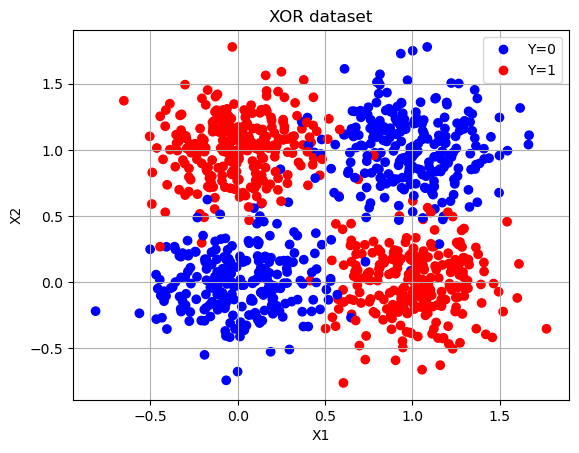

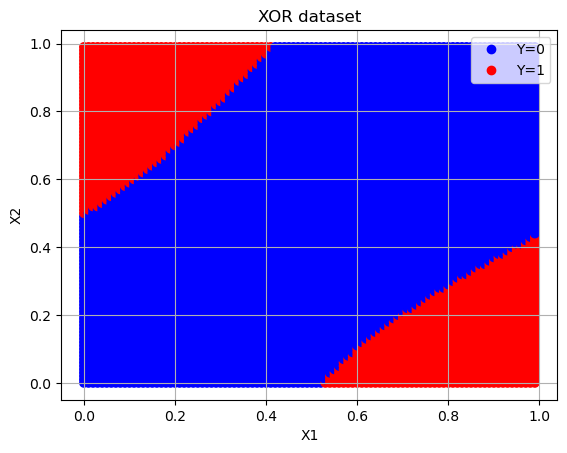

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

x_seeds = np.array([(0, 0), (1, 0), (0, 1), (1, 1)], dtype=float)
y_seeds = np.array([0, 1, 1, 0])

N = 1000
idxs = np.random.randint(0, 4, N)
X = x_seeds[idxs]
Y = y_seeds[idxs]

X += np.random.normal(scale=0.25, size=X.shape)

colors = ListedColormap(['blue', 'red'])
X1 = [i[0] for i in X]
X2 = [i[1] for i in X]

plt.figure()
scatter = plt.scatter(x=X1, y=X2, c=Y, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=['Y=0', 'Y=1'])
plt.title('XOR dataset')
plt.xlabel('X1')
plt.ylabel('X2')

plt.grid()


class shallow_neural_network():
    def __init__(self, num_input_features, num_hiddens):
        self.num_input_features = num_input_features
        self.num_hiddens = num_hiddens

        self.W1 = np.random.normal(size=(num_hiddens, num_input_features))
        self.b1 = np.random.normal(size=num_hiddens)
        self.W2 = np.random.normal(size=num_hiddens)
        self.b2 = np.random.normal(size=1)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def predict(self, x):
        z1 = np.matmul(self.W1, x) + self.b1
        a1 = np.tanh(z1)
        z2 = np.matmul(self.W2, a1) + self.b2
        a2 = self.sigmoid(z2)
        return a2, (z1, a1, z2, a2),


def train(X, Y, model, lr=0.1):
    dW1 = np.zeros_like(model.W1)
    db1 = np.zeros_like(model.b1)
    dW2 = np.zeros_like(model.W2)
    db2 = np.zeros_like(model.b2)
    m = len(X)
    cost = 0.0
    for x, y in zip(X, Y):
        a2, (z1, a1, z2, _) = model.predict(x)
        if y == 1:
            cost -= np.log(a2)
        else:
            cost -= np.log(1 - a2)
        diff = a2[0] - y
        db2 += diff
        for i in range(model.num_hiddens):
            dW2[i] += a1[i] * diff
        for i in range(model.num_hiddens):
            db1[i] += diff * model.W2[i] * (1 - a1[i] ** 2)
        for i in range(model.num_hiddens):
            for j in range(model.num_input_features):
                dW1[i, j] += diff * model.W2[i] * (1 - a1[i] ** 2) * x[j]
    cost /= m
    model.W1 -= lr * dW1 / m
    model.b1 -= lr * db1 / m
    model.W2 -= lr * dW2 / m
    model.b2 -= lr * db2 / m
    return cost


model = shallow_neural_network(2, 3)
for epoch in range(100):
    cost = train(X, Y, model, 1.0)
    if epoch % 10 == 0:
        print(epoch, cost)

print(model.predict((1, 1))[0].item())
print(model.predict((1, 0))[0].item())
print(model.predict((0, 1))[0].item())
print(model.predict((0, 0))[0].item())

X_bound_list = []
Y_bound_list = []
xstep = 0.01
for x1 in np.arange(0, 1, xstep):
    for x2 in np.arange(0, 1, xstep):
        yhat = model.predict((x1, x2))[0].item()
        y_label = 1 if yhat > 0.5 else 0
        X_bound_list.append([x1, x2])
        Y_bound_list.append(y_label)
        

colors = ListedColormap(['blue', 'red'])
X1 = [i[0] for i in X_bound_list]
X2 = [i[1] for i in X_bound_list]

plt.figure()
scatter = plt.scatter(x=X1, y=X2, c=Y_bound_list, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=['Y=0', 'Y=1'])
plt.title('XOR dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()
